## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


Giovanni Rosati (Part-time pacing)

Instructor: Jeff Herman

Blog URL: 


# Module 3 Final Project



Citation requested:

Kelwin Fernandes, Jaime S. Cardoso, and Jessica Fernandes. 'Transfer Learning with Partial Observability Applied to Cervical Cancer Screening.' Iberian Conference on Pattern Recognition and Image Analysis. Springer International Publishing, 2017.

Dataset link: https://archive.ics.uci.edu/ml/datasets/Cervical+cancer+%28Risk+Factors%29#

In [51]:
# needed imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats

%matplotlib inline

In [52]:
# added this cell to look at the data before converting ? values to NaN
df_test = pd.read_csv('risk_factors_cervical_cancer.csv')

for column in df_test.columns:
    print('Unique values and count in {}'.format(column))
    print(pd.value_counts(df_test[column].values))

Unique values and count in Age
23    54
18    50
21    46
20    45
19    44
24    39
25    39
26    38
28    37
30    35
17    35
29    33
27    33
22    30
35    29
33    28
31    27
36    24
34    24
16    23
15    21
32    18
37    17
41    13
40    12
39     9
38     9
45     6
44     6
42     6
43     5
14     5
46     3
48     2
49     2
52     2
70     2
84     1
79     1
47     1
50     1
51     1
59     1
13     1
dtype: int64
Unique values and count in Number of sexual partners
2.0     272
3.0     208
1.0     206
4.0      78
5.0      44
?        26
6.0       9
7.0       7
8.0       4
9.0       1
10.0      1
15.0      1
28.0      1
dtype: int64
Unique values and count in First sexual intercourse
15.0    163
17.0    151
18.0    137
16.0    121
14.0     79
19.0     60
20.0     37
13.0     25
21.0     20
23.0      9
22.0      9
?         7
26.0      7
12.0      6
27.0      6
24.0      6
29.0      5
28.0      3
11.0      2
10.0      2
25.0      2
32.0      1
dtype: int64
Unique va

In [53]:
# load the dataset as a Pandas dataframe
df_import = pd.read_csv('risk_factors_cervical_cancer.csv', na_values="?")

In [54]:
df_import.columns

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'],
      dtype='object')

In [55]:
for column in df_import.columns:
    print(column)

Age
Number of sexual partners
First sexual intercourse
Num of pregnancies
Smokes
Smokes (years)
Smokes (packs/year)
Hormonal Contraceptives
Hormonal Contraceptives (years)
IUD
IUD (years)
STDs
STDs (number)
STDs:condylomatosis
STDs:cervical condylomatosis
STDs:vaginal condylomatosis
STDs:vulvo-perineal condylomatosis
STDs:syphilis
STDs:pelvic inflammatory disease
STDs:genital herpes
STDs:molluscum contagiosum
STDs:AIDS
STDs:HIV
STDs:Hepatitis B
STDs:HPV
STDs: Number of diagnosis
STDs: Time since first diagnosis
STDs: Time since last diagnosis
Dx:Cancer
Dx:CIN
Dx:HPV
Dx
Hinselmann
Schiller
Citology
Biopsy


In [56]:
df_import.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
Age                                   858 non-null int64
Number of sexual partners             832 non-null float64
First sexual intercourse              851 non-null float64
Num of pregnancies                    802 non-null float64
Smokes                                845 non-null float64
Smokes (years)                        845 non-null float64
Smokes (packs/year)                   845 non-null float64
Hormonal Contraceptives               750 non-null float64
Hormonal Contraceptives (years)       750 non-null float64
IUD                                   741 non-null float64
IUD (years)                           741 non-null float64
STDs                                  753 non-null float64
STDs (number)                         753 non-null float64
STDs:condylomatosis                   753 non-null float64
STDs:cervical condylomatosis          753 non-null float64
STDs:vaginal

In [57]:
df_import.isna().sum()

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

In [58]:
for column in df_import.columns:
    print('Unique values in {}'.format(column))
    values_list = df_import[column].unique()
    values_list.sort()
    print (values_list)
        

Unique values in Age
[13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36
 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 59 70 79 84]
Unique values in Number of sexual partners
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 15. 28. nan]
Unique values in First sexual intercourse
[10. 11. 12. 13. 14. 15. 16. 17. 18. 19. 20. 21. 22. 23. 24. 25. 26. 27.
 28. 29. 32. nan]
Unique values in Num of pregnancies
[ 0.  1.  2.  3.  4.  5.  6.  7.  8. 10. 11. nan]
Unique values in Smokes
[ 0.  1. nan]
Unique values in Smokes (years)
[ 0.          0.16        0.5         1.          1.26697291  2.
  3.          4.          5.          6.          7.          8.
  9.         10.         11.         12.         13.         14.
 15.         16.         18.         19.         20.         21.
 22.         24.         28.         32.         34.         37.
         nan]
Unique values in Smokes (packs/year)
[0.00000000e+00 1.00000000e-03 3.00000000e-03 2.50000000e-02
 4.00000000e-02 5.000

In [59]:
# copy the import to a new dataframe
df = df_import

In [60]:
df.isna().sum()

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

# NEED TO REDO THIS

Many of the factors have missing values,

I plan to create new factors so that the information contained between those records with a value and without is not lost. 

Smokes, Hormonal Contraceptives, IUD, and STDs are all boolean factors with missing values. I will change these factors to categorical factors with three values: True, False, Unknown.

For factors that are ordinal (Number of sexual partners, First sexual intercourse, Num of pregnancies) I will create an new boolean factor to identify which records had a value from those that did not, and then replace the missing values with the mean from that factor.



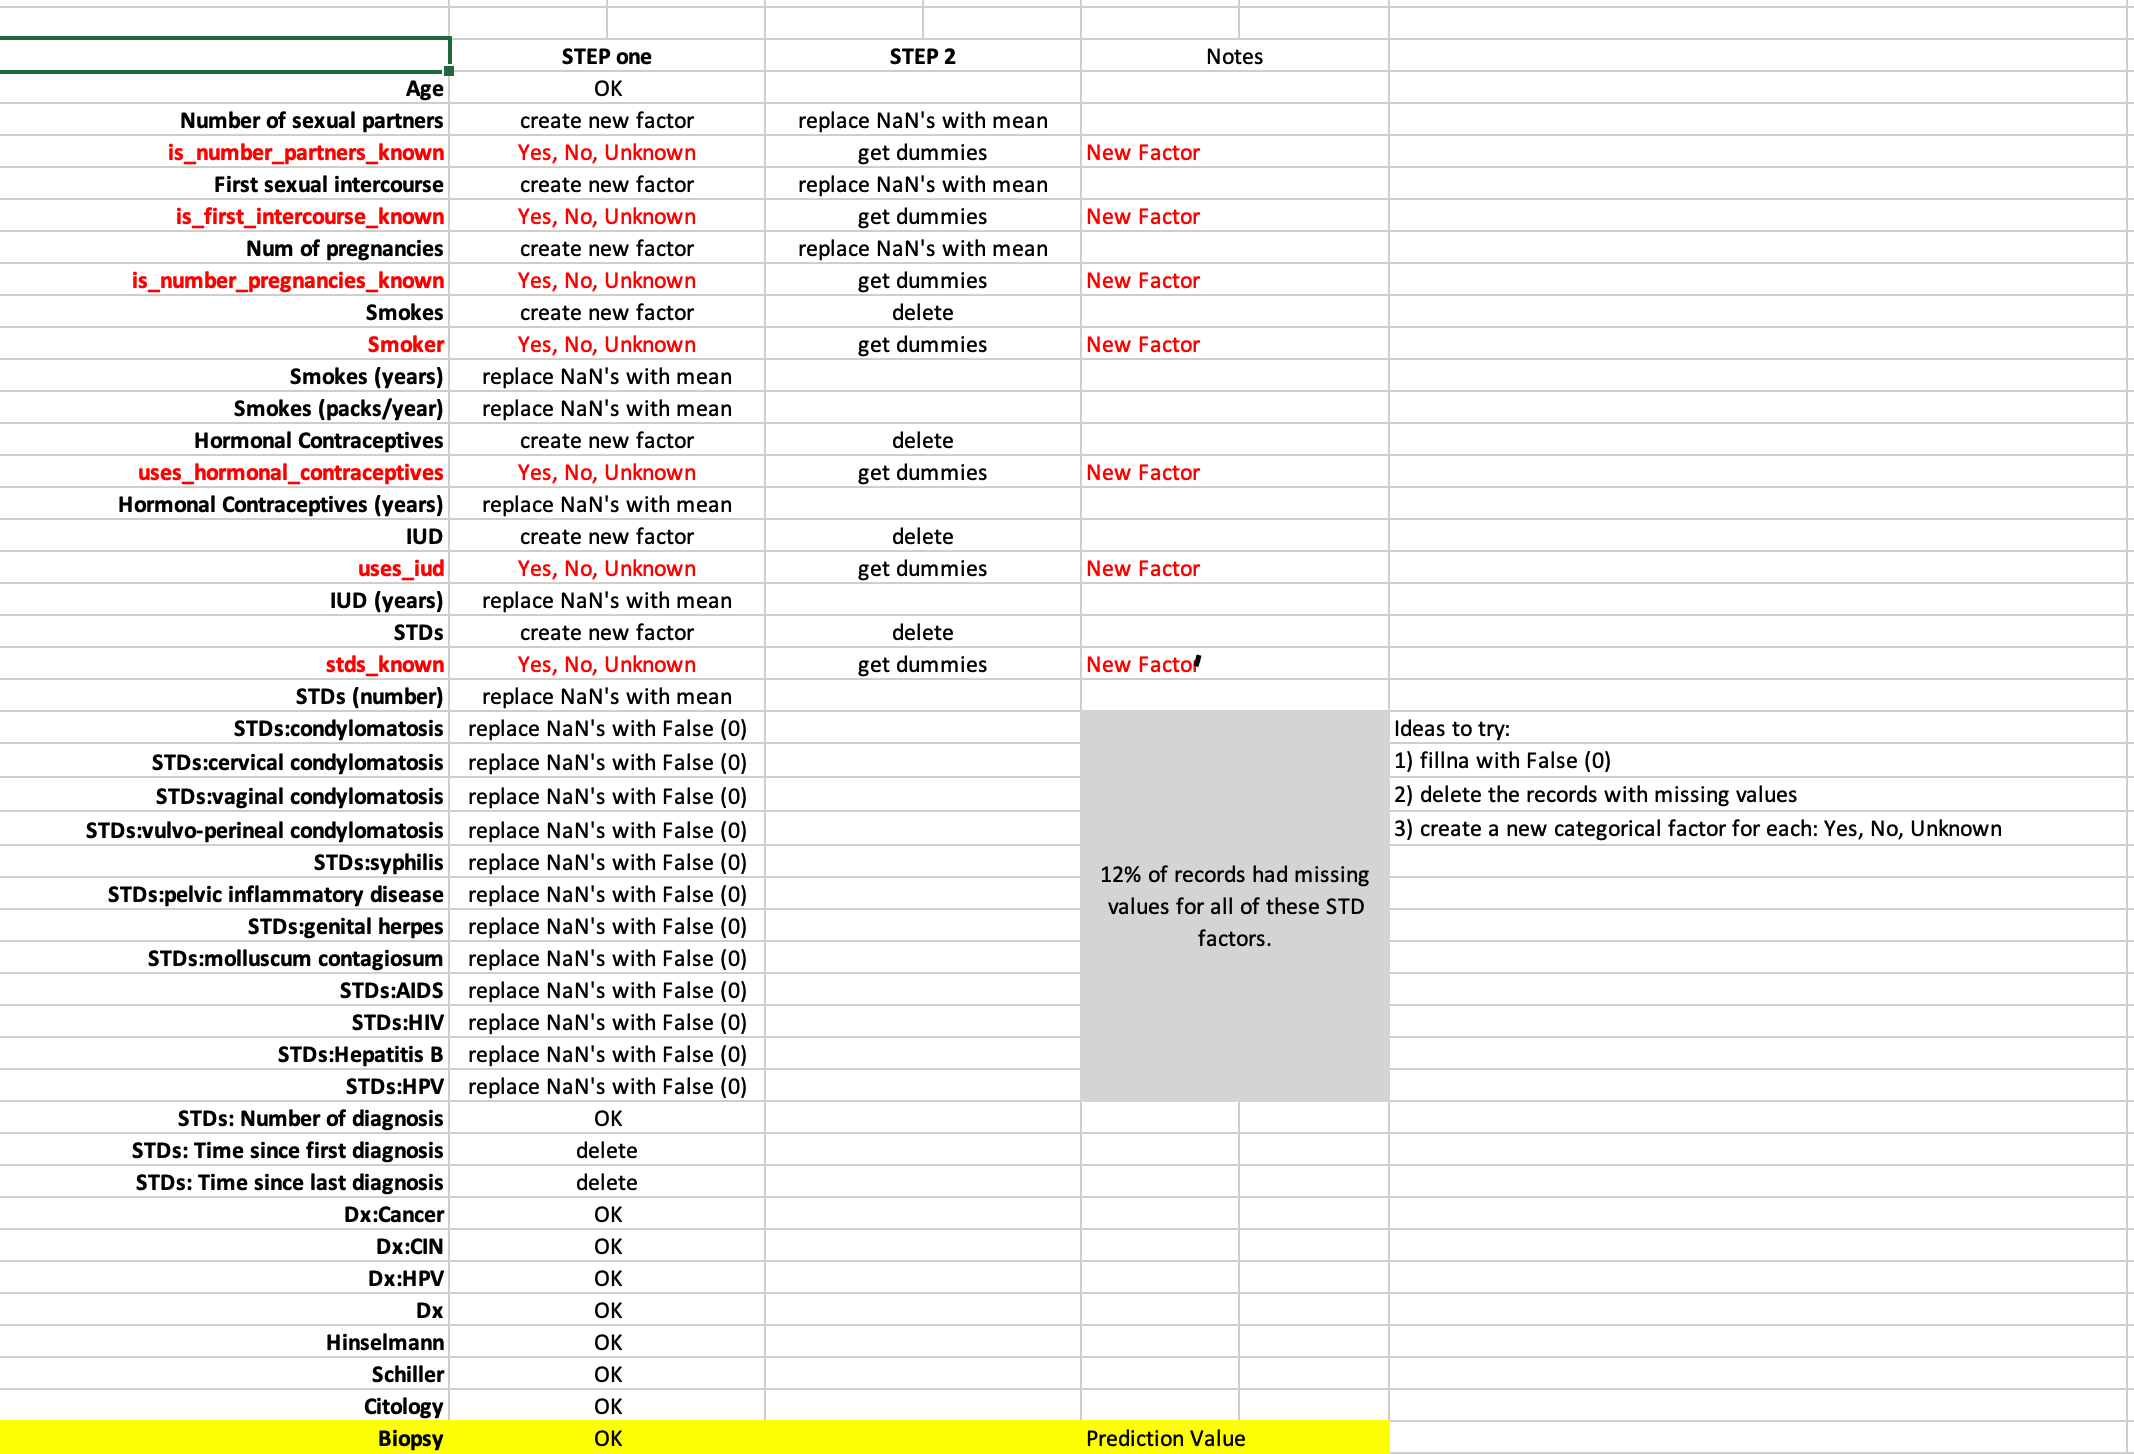

In [61]:
# function to create a new boolean column in a df,
# given a column with int, float, and/or numpy.nan values.

def new_bool(df, col_name):
    bool_list = []
    for index, row in df.iterrows():
#         print(row)
        value = row[col_name]
#         print(value)
        value_out = np.True_
        if pd.isna(value):
            value_out = np.False_
            
#       for testing
#         print("value: {}   -   bool: {}".format(value, str(value_out)))

        bool_list.append(value_out)

    return bool_list

#       for testing
#         print("value: {}   -   bool: {}".format(value, str(row[new_col_name])))


In [62]:
# create new factor 'is_number_partners_known'
df['is_number_partners_known'] = new_bool(df, 'Number of sexual partners')

In [63]:
# check if operation was successful
df['is_number_partners_known'].value_counts()

True     832
False     26
Name: is_number_partners_known, dtype: int64

In [64]:
# create new factor 'is_first_intercourse_known'
df['is_first_intercourse_known'] = new_bool(df, 'First sexual intercourse')

In [65]:
# check if operation was successful
df['is_first_intercourse_known'].value_counts()

True     851
False      7
Name: is_first_intercourse_known, dtype: int64

In [66]:
# create new factor 'is_number_pregnancies_known'
df['is_number_pregnancies_known'] = new_bool(df, 'Num of pregnancies')

In [67]:
# check if operation was successful
df['is_number_pregnancies_known'].value_counts()

True     802
False     56
Name: is_number_pregnancies_known, dtype: int64

In [68]:
# function to replace boolean factors that have missing values with a categorical factor with three values:
# Yes, No, Unknown

def new_categorical(df, col_name):
    values_list = []
    for index, row in df.iterrows():
        value = row[col_name]
        
#         print('original value: {}'.format(value))
        if pd.isna(value):
            value = "Unknown"
        elif value == 1.0:
            value = "Yes"
        else:
            value = "No"
        
#         print('new value: {}'.format(value))
        values_list.append(value)
    
    return values_list


In [69]:
# create new factor 'is_number_pregnancies_known'
df['smoker'] = new_categorical(df, 'Smokes')

# check if operation was successful
df['smoker'].value_counts()

No         722
Yes        123
Unknown     13
Name: smoker, dtype: int64

In [70]:
# create new factor 'uses_hormonal_contraceptives'
df['uses_hormonal_contraceptives'] = new_categorical(df, 'Hormonal Contraceptives')

# check if operation was successful
df['uses_hormonal_contraceptives'].value_counts()


Yes        481
No         269
Unknown    108
Name: uses_hormonal_contraceptives, dtype: int64

In [71]:
# create new factor 'uses_iud'
df['uses_iud'] = new_categorical(df, 'IUD')

# check if operation was successful
df['uses_iud'].value_counts()


No         658
Unknown    117
Yes         83
Name: uses_iud, dtype: int64

In [72]:
# create new factor 'stds_known'
df['stds_known'] = new_categorical(df, 'STDs')

# check if operation was successful
df['stds_known'].value_counts()


No         674
Unknown    105
Yes         79
Name: stds_known, dtype: int64


* replace NaN's with mean:
    * Number of sexual partners
    * First sexual intercourse
    * Num of pregnancies
    * Smokes (years)
    * Smokes (packs/year)
    * Hormonal Contraceptives (years)
    * IUD (years)
    * STDs (number)
      
* replace NaN's with zero:
    * STDs:condylomatosis
    * STDs:cervical condylomatosis
    * STDs:vaginal condylomatosis
    * STDs:vulvo-perineal condylomatosis
    * STDs:syphilis
    * STDs:pelvic inflammatory disease
    * STDs:genital herpes
    * STDs:molluscum contagiosum
    * STDs:AIDS
    * STDs:HIV
    * STDs:Hepatitis B
    * STDs:HPV
    
* Drop columns:
    * Smokes
    * Hormonal Contraceptives
    * IUD
    * STDs
    * STDs: Time since first diagnosis
    * STDs: Time since last diagnosis
    
* get dummies for categorical factors:
    * is_number_partners_known
    * is_first_intercourse_known
    * is_number_pregnancies_known
    * smoker
    * uses_hormonal_contraceptives
    * uses_iud
    * stds_known
    

In [83]:
df2 = df.drop(['Smokes',
             'Hormonal Contraceptives',
             'IUD',
             'STDs',
             'STDs: Time since first diagnosis',
             'STDs: Time since last diagnosis'], axis=1)

In [84]:
df2.isna().sum()

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives (years)       108
IUD (years)                           117
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                      105
STDs:HPV                              105
STDs: Number of diagnosis               0
Dx:Cancer                               0
Dx:CIN                            

In [85]:
df2.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes (years),Smokes (packs/year),Hormonal Contraceptives (years),IUD (years),STDs (number),STDs:condylomatosis,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,832.000000,851.000000,802.000000,845.000000,845.000000,750.000000,741.000000,753.000000,753.000000,...,753.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,2.527644,16.995300,2.275561,1.219721,0.453144,2.256419,0.514804,0.176627,0.058433,...,0.002656,0.087413,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,1.667760,2.803355,1.447414,4.089017,2.226610,3.764254,1.943089,0.561993,0.234716,...,0.051503,0.302545,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,37.000000,37.000000,30.000000,19.000000,4.000000,1.000000,...,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [86]:
# replace continious factors missing values with the mean for each factor 
col_list = ['Number of sexual partners',
    'First sexual intercourse',
    'Num of pregnancies',
    'Smokes (years)',
    'Smokes (packs/year)',
    'Hormonal Contraceptives (years)',
    'IUD (years)',
    'STDs (number)']


for col in col_list:
    df2[col].fillna(df2[column].mean(), inplace=True)

In [87]:
df2.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes (years),Smokes (packs/year),Hormonal Contraceptives (years),IUD (years),STDs (number),STDs:condylomatosis,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,753.000000,...,753.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,2.452991,16.857166,2.131223,1.202212,0.447249,1.980463,0.453345,0.162856,0.058433,...,0.002656,0.087413,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,1.695755,3.180723,1.502272,4.060342,2.210169,3.593520,1.812206,0.527732,0.234716,...,0.051503,0.302545,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,0.064103,0.064103,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,1.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,37.000000,37.000000,30.000000,19.000000,4.000000,1.000000,...,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [88]:
df2.isna().sum()

Age                                     0
Number of sexual partners               0
First sexual intercourse                0
Num of pregnancies                      0
Smokes (years)                          0
Smokes (packs/year)                     0
Hormonal Contraceptives (years)         0
IUD (years)                             0
STDs (number)                           0
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                      105
STDs:HPV                              105
STDs: Number of diagnosis               0
Dx:Cancer                               0
Dx:CIN                            

In [89]:
# replace missing values in boolean factors with 0 (False)

col_list = ['STDs:condylomatosis',
            'STDs:cervical condylomatosis',
            'STDs:vaginal condylomatosis',
            'STDs:vulvo-perineal condylomatosis',
            'STDs:syphilis',
            'STDs:pelvic inflammatory disease',
            'STDs:genital herpes',
            'STDs:molluscum contagiosum',
            'STDs:AIDS',
            'STDs:HIV',
            'STDs:Hepatitis B',
            'STDs:HPV']
    
for col in col_list:
    df2[col].fillna(0, inplace=True)

In [90]:
df2.isna().sum()

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives (years)       0
IUD (years)                           0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0
STDs: Number of diagnosis             0
Dx:Cancer                             0
Dx:CIN                                0
Dx:HPV                                0


In [ ]:
# replaced with the cell below

# col_list = ['is_number_partners_known',
#             'is_first_intercourse_known',
#             'is_number_pregnancies_known',
#             'smoker',
#             'uses_hormonal_contraceptives',
#             'uses_iud',
#             'stds_known',
#             'Dx:Cancer',
#             'Dx:CIN',
#             'Dx:HPV',
#             'Dx',
#             'Hinselmann',
#             'Schiller',
#             'Citology']

# for col in col_list:
#     df2[col] = 

In [91]:
df2 = pd.get_dummies(data=df2, columns=['is_number_partners_known',
            'is_first_intercourse_known',
            'is_number_pregnancies_known',
            'smoker',
            'uses_hormonal_contraceptives',
            'uses_iud',
            'stds_known',
            'Dx:Cancer',
            'Dx:CIN',
            'Dx:HPV',
            'Dx',
            'Hinselmann',
            'Schiller',
            'Citology'])

In [92]:
df2.columns

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives (years)', 'IUD (years)', 'STDs (number)',
       'STDs:condylomatosis', 'STDs:cervical condylomatosis',
       'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis',
       'STDs:syphilis', 'STDs:pelvic inflammatory disease',
       'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:AIDS',
       'STDs:HIV', 'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'Biopsy', 'is_number_partners_known_False',
       'is_number_partners_known_True', 'is_first_intercourse_known_False',
       'is_first_intercourse_known_True', 'is_number_pregnancies_known_False',
       'is_number_pregnancies_known_True', 'smoker_No', 'smoker_Unknown',
       'smoker_Yes', 'uses_hormonal_contraceptives_No',
       'uses_hormonal_contraceptives_Unknown',
       'uses_hormonal_contraceptives_Yes', 'uses_iu

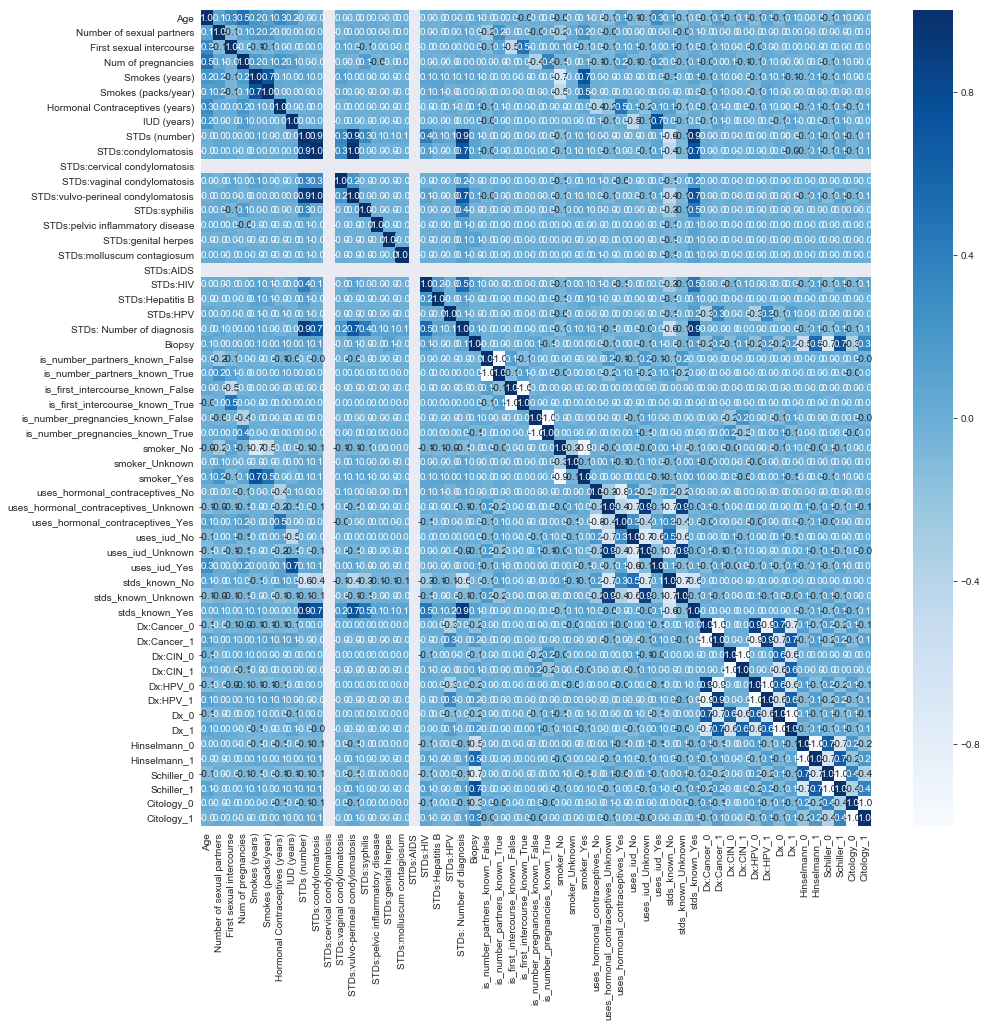

In [93]:
f,ax = plt.subplots(figsize=(15,15))
sns.heatmap(df2.loc[:,:].corr(), annot=True, cmap="Blues", fmt='.1f')
plt.show()

Two factors appear to have no information, ie. all values are the same for the factor.

In [98]:
df2['STDs:cervical condylomatosis'].value_counts()

KeyError: 'STDs:cervical condylomatosis'

In [95]:
df2['STDs:AIDS'].value_counts()

0.0    858
Name: STDs:AIDS, dtype: int64

In [96]:
# drop these two factors
df2.drop(['STDs:cervical condylomatosis','STDs:AIDS'], axis=1, inplace=True)

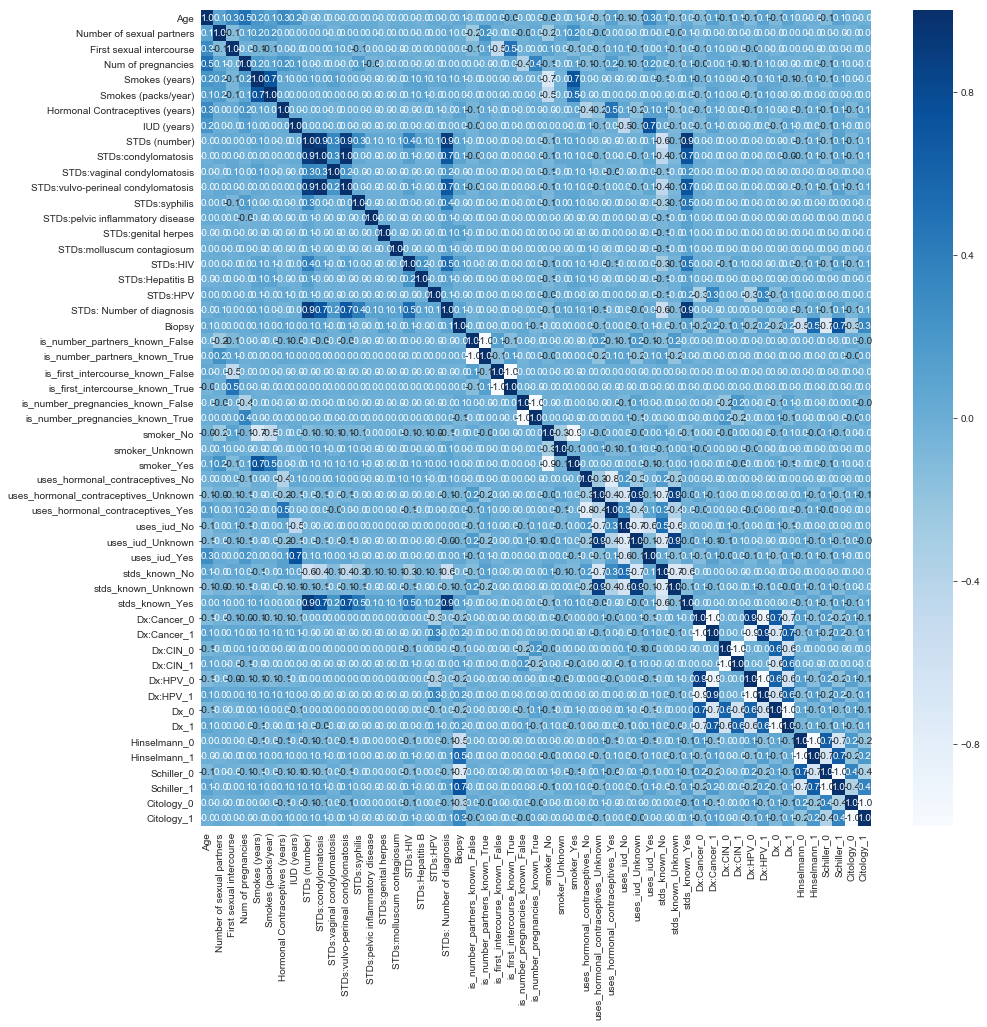

In [99]:
# rerun the map
f,ax = plt.subplots(figsize=(15,15))
sns.heatmap(df2.loc[:,:].corr(), annot=True, cmap="Blues", fmt='.1f')
plt.show()

In [49]:
X = df2.drop('Biopsy', axis=1)
X.head()


,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes (years),Smokes (packs/year),Hormonal Contraceptives (years),IUD (years),STDs (number),STDs:condylomatosis,...,Hinselmann,Schiller,Citology,is_number_partners_known,is_first_intercourse_known,is_number_pregnancies_known,Smoker,uses_hormonal_contraceptives,uses_iud,stds_known
0,18,4.0,15.0000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,True,True,True,No,No,No,No
1,15,1.0,14.0000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,True,True,True,No,No,No,No
2,34,1.0,16.9953,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,True,False,True,No,No,No,No
3,52,5.0,16.0000,4.0,37.0,37.0,3.0,0.0,0.0,0.0,...,0,0,0,True,True,True,Yes,Yes,No,No
4,46,3.0,21.0000,4.0,0.0,0.0,15.0,0.0,0.0,0.0,...,0,0,0,True,True,True,No,Yes,No,No


In [50]:
y = df2['Biopsy']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Biopsy, dtype: int64

In [ ]:
# test using random forest to determine feature importance
from sklearn.ensemble import ExtraTreesClassifier

forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()